# Batch VS Stochastic VS Mini-Batch

In [1]:
import numpy as np
import pandas as pd
import time
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Unstopable18/Datasets/main/mall_customer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [4]:
df['Annual_Income']=df['Annual Income (k$)']*1000
# df['Spending_Score']=round(df['Spending Score (1-100)']/10).astype(int)
# df['Spending_Score']=np.where(df['Spending_Score']>=5,1,0) 
df['Spending_Score']=np.where(df['Spending Score (1-100)']>=df['Spending Score (1-100)'].mean(),1,0) 
df.drop(columns=['Annual Income (k$)','Spending Score (1-100)'],inplace=True)
df.head()

,Age,Annual_Income,Spending_Score
0,19,15000,0
1,21,15000,1
2,20,16000,0
3,23,16000,1
4,31,17000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             200 non-null    int64
 1   Annual_Income   200 non-null    int64
 2   Spending_Score  200 non-null    int32
dtypes: int32(1), int64(2)
memory usage: 4.0 KB


In [6]:
df.Spending_Score.value_counts()

0    103
1     97
Name: Spending_Score, dtype: int64

In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Batch GD

In [9]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history1 = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
160/160 [==============================] - 1s 4ms/step - loss: 0.6890 - accuracy: 0.5437 - val_loss: 0.6279 - val_accuracy: 0.6000
Epoch 2/500
160/160 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5875 - val_loss: 0.6135 - val_accuracy: 0.7000
Epoch 3/500
160/160 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.5938 - val_loss: 0.5987 - val_accuracy: 0.7500
Epoch 4/500
160/160 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6187 - val_loss: 0.5892 - val_accuracy: 0.8000
Epoch 5/500
160/160 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6500 - val_loss: 0.5753 - val_accuracy: 0.8000
Epoch 6/500
160/160 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6375 - val_loss: 0.5738 - val_accuracy: 0.7500
Epoch 7/500
160/160 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6750 - val_loss: 0.5682 - val_accuracy: 0.8000

### Stochastic GD

In [11]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history2 = model.fit(X_scaled,y,epochs=500,batch_size=200,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.6787 - accuracy: 0.6438 - val_loss: 0.6537 - val_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 92ms/step - loss: 0.6766 - accuracy: 0.6562 - val_loss: 0.6513 - val_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 74ms/step - loss: 0.6750 - accuracy: 0.6687 - val_loss: 0.6495 - val_accuracy: 0.5250
Epoch 4/500
1/1 [==============================] - 0s 96ms/step - loss: 0.6738 - accuracy: 0.6687 - val_loss: 0.6480 - val_accuracy: 0.5500
Epoch 5/500
1/1 [==============================] - 0s 81ms/step - loss: 0.6727 - accuracy: 0.6687 - val_loss: 0.6468 - val_accuracy: 0.5750
Epoch 6/500
1/1 [==============================] - 0s 68ms/step - loss: 0.6718 - accuracy: 0.6687 - val_loss: 0.6458 - val_accuracy: 0.5750
Epoch 7/500
1/1 [==============================] - 0s 74ms/step - loss: 0.6709 - accuracy: 0.6625 - val_loss: 0.6450 - val_accuracy: 0.5750
Epoch 8/500
1/1 [=====

### Mini- Batch GD

In [13]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history3 = model.fit(X_scaled,y,epochs=500,batch_size=100,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
2/2 [==============================] - 2s 396ms/step - loss: 0.7042 - accuracy: 0.5125 - val_loss: 0.6980 - val_accuracy: 0.4000
Epoch 2/500
2/2 [==============================] - 0s 67ms/step - loss: 0.6961 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4750
Epoch 3/500
2/2 [==============================] - 0s 67ms/step - loss: 0.6911 - accuracy: 0.5000 - val_loss: 0.6894 - val_accuracy: 0.5250
Epoch 4/500
2/2 [==============================] - 0s 67ms/step - loss: 0.6874 - accuracy: 0.5312 - val_loss: 0.6858 - val_accuracy: 0.6250
Epoch 5/500
2/2 [==============================] - 0s 68ms/step - loss: 0.6837 - accuracy: 0.5562 - val_loss: 0.6830 - val_accuracy: 0.6750
Epoch 6/500
2/2 [==============================] - 0s 108ms/step - loss: 0.6806 - accuracy: 0.5688 - val_loss: 0.6802 - val_accuracy: 0.6750
Epoch 7/500
2/2 [==============================] - 0s 135ms/step - loss: 0.6780 - accuracy: 0.6000 - val_loss: 0.6776 - val_accuracy: 0.6750
Epoch 8/500
2/2 [

### Comparison Study for Loss

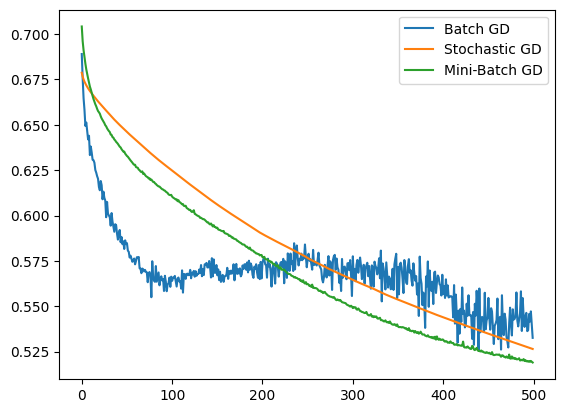

In [15]:
plt.plot(history1.history['loss'], label='Batch GD')
plt.plot(history2.history['loss'], label='Stochastic GD')
plt.plot(history3.history['loss'], label='Mini-Batch GD')
plt.legend()
plt.show()

### Comparison Study for Accuracy

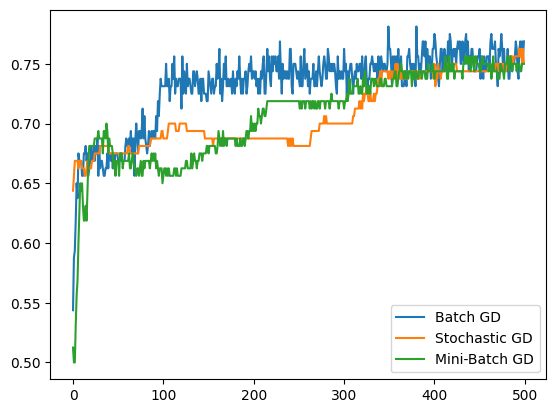

In [16]:
plt.plot(history1.history['accuracy'], label='Batch GD')
plt.plot(history2.history['accuracy'], label='Stochastic GD')
plt.plot(history3.history['accuracy'], label='Mini-Batch GD')
plt.legend()
plt.show()